In [11]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [147]:
folder_path = "C:/Users/PC/Desktop/FewShotPhd/model_hvu/vae_2d"
identifier = "20_03_2022_18_54_28"

file_name = identifier+"/log.txt"
csv_name = identifier+"/losses.csv"

file_path = os.path.join(folder_path, file_name)
csv_path = os.path.join(folder_path, csv_name)

In [148]:
file_lines = None

with open(file_path, 'r', encoding="utf-8") as file:
    file_lines = file.readlines() 
    
    for idx,line in enumerate(file_lines):
        file_lines[idx] = file_lines[idx].strip()    

In [149]:
file_lines

['=== Device: cuda:0 ===',
 '=== N-way: 3 -- K-shot: 5 ===',
 '',
 '=== Epoch: 0/100 ===',
 '=== Learning Rate: [1e-05] ===',
 "{'RC': tensor([1.], device='cuda:0'), 'C-RC': tensor([0.], device='cuda:0'), 'KL': tensor([0.], device='cuda:0'), 'Dist-Algn': tensor([0.], device='cuda:0'), 'CE': tensor([0.], device='cuda:0')}",
 '###################',
 'LOSSES TRAIN- Epoch: 0 Iter: 299',
 '###################',
 'Recons_v_v: 0.02632',
 'Recons_t_t: 0.00211',
 'Cross_Recons_v_t: 0.10751',
 'Cross_Recons_t_v: 0.00655',
 'KL_v: 3748.35840',
 'KL_t: 2435.61670',
 'Dist_Align: 4011.93506',
 'CE: 1.13660',
 'Pred_Labels: [2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2]',
 'Avg Train Loss: 0.15278880338494977',
 'Avg Val Loss: 0.023521819189190864, Previously Best Loss: inf',
 '',
 '=== Epoch: 1/100 ===',
 '=== Learning Rate: [1e-05] ===',
 "{'RC': tensor([1.], device='cuda:0'), 'C-RC': tensor([0.], device='cuda:0'), 'KL': tensor([0.], device='cuda:0'), 'Dist-Algn': tensor([0.], device='cuda:0'), 'CE

In [150]:
train_loss = []
val_loss = []

for line in file_lines:
    if line.__contains__("Avg Train Loss:"):
        train_loss.append(float(line.split(" ")[-1]))
    
    if line.__contains__("Avg Val Loss:"):
        val_loss.append(float(line.split(" ")[-1]))
        
n_epoch = len(train_loss)

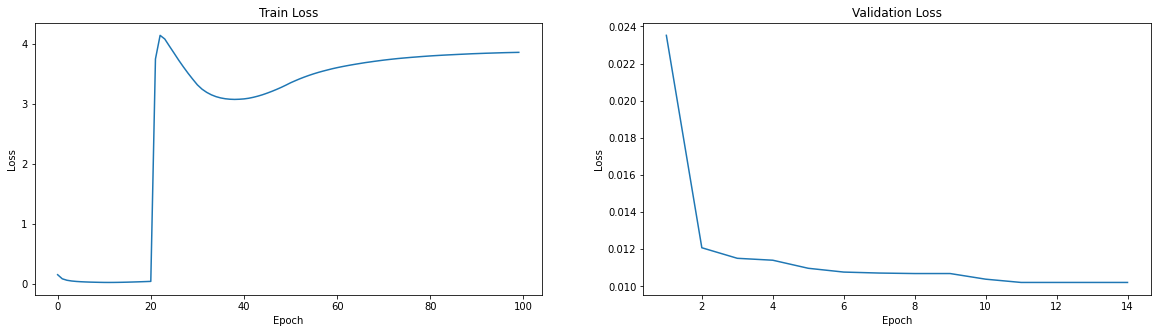

In [151]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5)) 

#manipulating the first Axes 
ax[0].plot(np.arange(n_epoch),train_loss) 
ax[0].set_xlabel('Epoch') 
ax[0].set_ylabel('Loss') 
ax[0].set_title('Train Loss');

#manipulating the second Axes 
ax[1].plot(np.arange(n_epoch),val_loss) 
ax[1].set_xlabel('Epoch') 
ax[1].set_ylabel('Loss') 
ax[1].set_title('Validation Loss');


In [152]:
## Analyse loss by loss
losses_df = pd.read_csv(csv_path)
losses_df.head(50)

,cons_loss,recons_loss,kl_loss,dist_loss,ce_loss
0,[0.028433701023459435],[0.1140587255358696],[6183.97509765625],[4011.93505859375],[1.1366018056869507]
1,[0.013797703199088573],[0.10191716253757477],[9447.49609375],[5157.302734375],[1.2076224088668823]
2,[0.013807442039251328],[0.09110509604215622],[14046.490234375],[6299.20751953125],[1.647009253501892]
3,[0.0109902024269104],[0.08604175597429276],[15786.203125],[6781.4541015625],[0.7441385388374329]
4,[0.010150337591767311],[0.08379438519477844],[15824.05078125],[6724.7001953125],[1.1414813995361328]
5,[0.01154695451259613],[0.08281190693378448],[14947.537109375],[6446.7822265625],[1.479645848274231]
6,[0.008809980936348438],[0.0777386799454689],[16868.55078125],[6766.404296875],[1.2399598360061646]
7,[0.008083358407020569],[0.08093385398387909],[14000.78515625],[6017.529296875],[1.4714070558547974]
8,[0.006583089474588633],[0.07648029923439026],[15566.8046875],[6405.76904296875],[1.0656721591949463]
9,[0.01065710186958313],[0.08027171343564987],[15710.873046875],[6480.9873046875],[1.2595632076263428]


In [153]:
for i in range(losses_df.shape[1]):
    for j in range(losses_df.iloc[:,i].shape[0]):
        res = str(losses_df.iloc[j,i])
        losses_df.iloc[j,i] = float(res.replace("[","").replace("]",""))


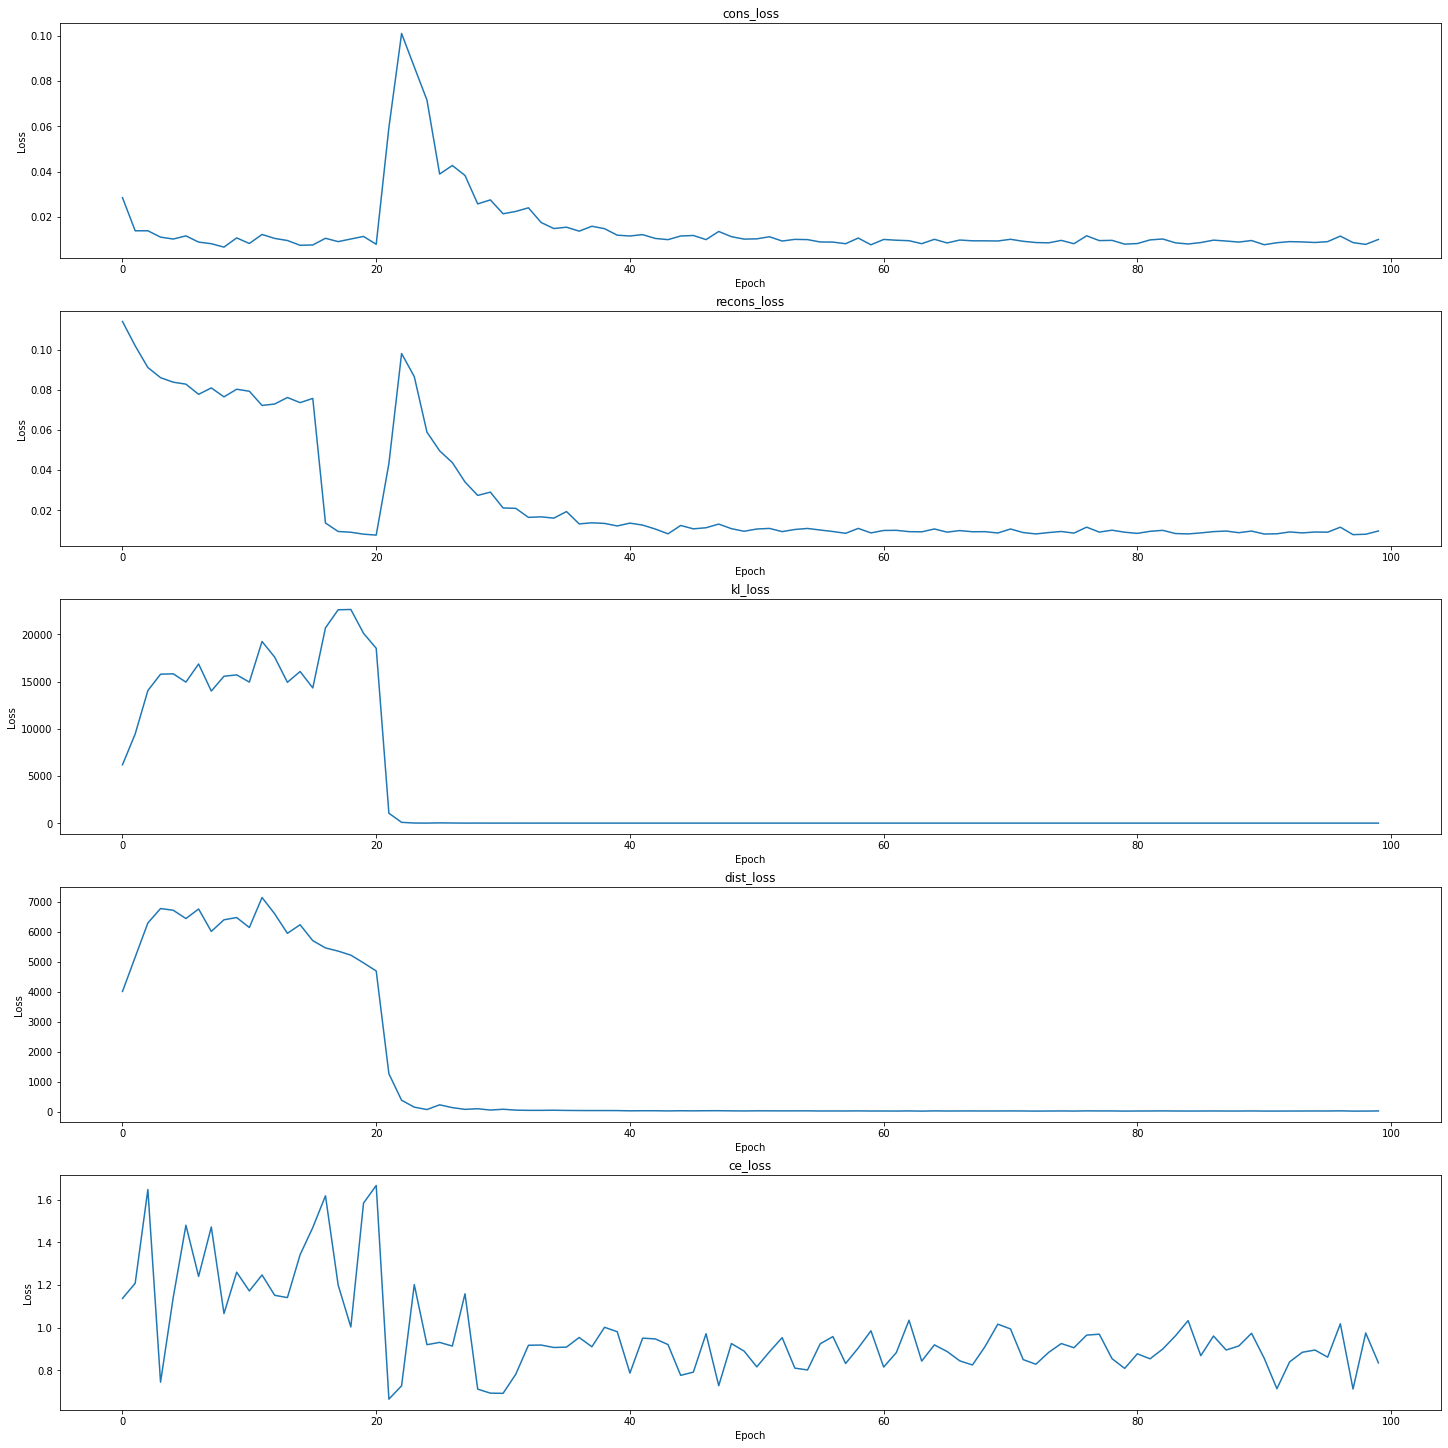

In [162]:
fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(20,20), constrained_layout=True) 
names = ["cons_loss", "recons_loss","kl_loss","dist_loss","ce_loss"]


for i in range(len(names)):
    #manipulating the first Axes 
    ax[i].plot(np.arange(losses_df.shape[0]),losses_df.iloc[:,i].values.tolist()) 
    ax[i].set_xlabel('Epoch') 
    ax[i].set_ylabel('Loss') 
    ax[i].set_title(names[i]);
    
plt.show()

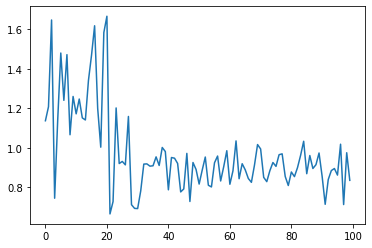

In [161]:
# CE loss after 15.th epoch
plt.plot(losses_df.iloc[:,4])

In [156]:
(losses_df.iloc[:,4]).max(), (losses_df.iloc[:,4]).min(), (losses_df.iloc[:,4]).mean(), (losses_df.iloc[:,4]).median(), (losses_df.iloc[:,4]).std()

(1.6659563779830933,
 0.6646754145622253,
 0.9720762711763382,
 0.9175681471824646,
 0.21219928303412677)

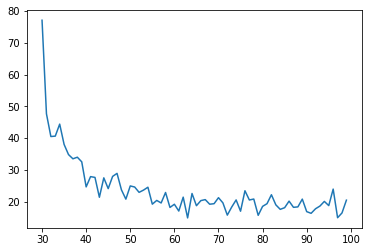

In [157]:
# dist_align loss after 15.th epoch
plt.plot(losses_df.iloc[30:,3])

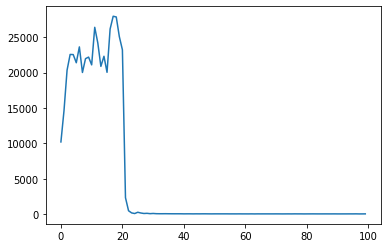

In [158]:
total_loss = []

for i in range(len(losses_df)):
    total_loss.append(sum(losses_df.iloc[i,:].values.tolist()))

plt.plot(total_loss)

In [159]:
# n.th epoch loss
losses_df.iloc[59,:]

cons_loss      0.00761286
recons_loss    0.00864756
kl_loss          0.204534
dist_loss         18.2014
ce_loss          0.984795
Name: 59, dtype: object

In [160]:
total_loss

[10197.189250482246,
 14606.122165399604,
 20347.449675697833,
 22568.49839705974,
 22549.986402684823,
 21395.89334064722,
 23636.281586621888,
 20019.874877393246,
 21973.722466016654,
 22193.21084358543,
 21096.480749501847,
 26406.44859705493,
 24189.06844493188,
 20881.417593745515,
 22311.323629278224,
 20041.434846309014,
 26165.35863697622,
 27972.45714023523,
 27869.86665434204,
 25089.42874447722,
 23226.39324849192,
 2311.579141370952,
 462.1303691789508,
 158.5680692717433,
 70.3250155299902,
 250.87880175188184,
 144.36107958108187,
 77.07572972401977,
 99.69776118732989,
 52.07879413664341,
 80.76793197356164,
 49.46215973980725,
 42.195042937994,
 42.32013266906142,
 46.30604757461697,
 39.7007008837536,
 36.48190435953438,
 35.084491594694555,
 35.561972551979125,
 34.09217665810138,
 25.820243552327156,
 29.27866132836789,
 29.064294363372028,
 22.611867129802704,
 28.841050814837217,
 25.324874185025692,
 29.393257431685925,
 30.306523064151406,
 24.99688977189362,
 2

In [146]:
np.log(max(total_loss)), np.log(min(total_loss))

(10.19910401084075, 2.9752659038335336)